In [1]:
%cd ..

/home/nikita/edu/competitions/admet


In [1]:
import pandas as pd
import numpy as np

In [4]:
train_data = pd.read_csv("desc_vector.csv")

In [9]:
train_data

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0.0,0.0,0.0,0.0,31.449179,2.607123,5.214247,31.449179,1.367356,...,10.542838,58.689897,301.110279,7.923955,970.0,48.0,136.0,172.0,5.861111,4.861111
1,1,0.0,0.0,0.0,0.0,68.986805,2.703846,5.287332,68.986805,1.379736,...,11.433677,106.317006,646.116486,9.501713,8149.0,118.0,312.0,407.0,13.388889,10.305556
2,2,0.0,0.0,0.0,0.0,12.806544,2.074313,4.148627,12.806544,1.164231,...,8.213653,38.726083,157.059974,8.725554,188.0,10.0,42.0,42.0,5.472222,2.833333
3,3,0.0,0.0,0.0,0.0,11.945822,2.267184,4.534368,11.945822,1.194582,...,8.912069,39.310842,138.017775,11.501481,116.0,12.0,46.0,51.0,4.333333,2.361111
4,4,0.0,0.0,0.0,0.0,23.580101,2.331667,4.663334,23.580101,1.241058,...,9.479527,51.289458,264.122240,7.546350,778.0,26.0,86.0,96.0,7.805556,4.638889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,7934,0.0,0.0,0.0,0.0,20.566611,2.480613,4.961227,20.566611,1.209801,...,9.947839,50.301872,274.950061,13.747503,460.0,30.0,90.0,108.0,7.638889,3.666667
7935,7935,0.0,0.0,1.0,2.0,34.049364,2.514721,4.847757,34.049364,1.261088,...,10.212038,78.369416,398.137239,8.125250,1993.0,43.0,142.0,169.0,10.472222,5.888889
7936,7936,0.0,0.0,1.0,1.0,31.118710,2.340051,4.576553,31.118710,1.296613,...,9.762673,71.444395,322.142976,7.670071,1597.0,30.0,120.0,135.0,6.666667,5.361111
7937,7937,0.0,0.0,0.0,0.0,36.251368,2.543817,5.087633,36.251368,1.294692,...,10.444095,63.734766,382.189257,7.077579,1854.0,54.0,146.0,179.0,10.722222,6.583333


In [29]:
import datamol as dm

init_train = dm.read_csv("train_admet.csv", smiles_column="Drug", index_col=0)
init_test = pd.read_csv("test_data.csv")

[12:00:53] WARNING: not removing hydrogen atom without neighbors
[12:00:53] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not removing hydrogen atom without neighbors
[12:00:54] WARNING: not r

,Drug_ID,Drug,Y,property,mol
0,0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1,
1,1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1,
2,2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1,
3,3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1,
4,4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1,
...,...,...,...,...,...
7934,7934,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1,3,
7935,7935,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1,3,
7936,7936,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1,3,
7937,7937,CCc1c(C)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(OC...,1,3,

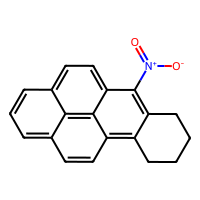
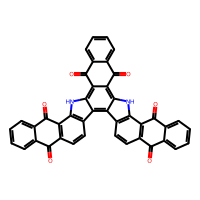
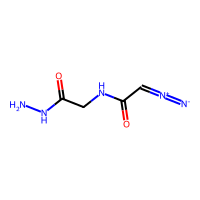
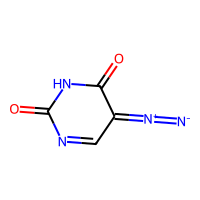
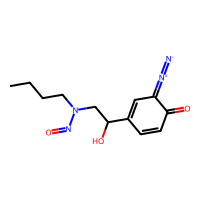
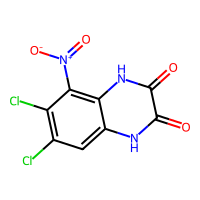
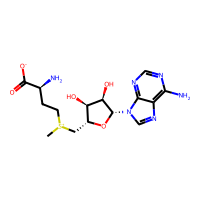
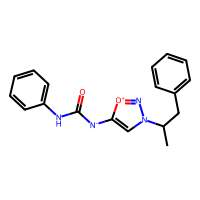
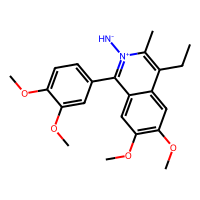
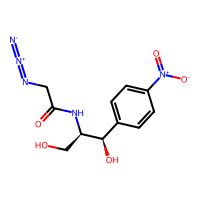

In [30]:
init_train

In [28]:
init_test

,Unnamed: 0,Drug_ID,Drug,property
0,0,0,Cc1cc(=O)oc2ccc3c(c12)C1(C)OOC1(C)O3,1
1,1,1,CN(CC(O)CO)N=O,1
2,2,2,O=[N+]([O-])c1ccc(OC2CO2)cc1,1
3,3,3,Cn1cnc2cc([N+](=O)[O-])ccc21,1
4,4,4,CC[C@H](CO)NCCN[C@H](CC)CO,1
...,...,...,...,...
1216,1216,1216,CCN(CC)C(=O)COc1cc2c(O)c3c(O)c(C)c4c(c13)C(=O)...,3
1217,1217,1217,O=C(Cc1ccc(Cl)c(Cl)c1)N1CCc2sccc2[C@H]1CN1CCCC1,3
1218,1218,1218,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)CC[C@H]3[C@...,3
1219,1219,1219,Cn1nc(-c2cccc(F)c2)n(C)c1=S,3


In [34]:
extensions = []
counter = 7939

for i in init_train.iterrows():
    drug = i[1]["Drug"]

    if "(C)" in drug:
        ex_1 = drug.replace("(C)", "(CC)")
        ex_2 = drug.replace("(C)", "(CCС)")

        new_drug_1 = {
            "Drug_ID": counter,
            "Drug": ex_1,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        new_drug_2 = {
            "Drug_ID": counter,
            "Drug": ex_2,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        extensions.extend([new_drug_1, new_drug_2])

    if "(CC)" in drug:
        ex_1 = drug.replace("(CC)", "(C)")
        ex_2 = drug.replace("(CC)", "(CCС)")

        new_drug_1 = {
            "Drug_ID": counter,
            "Drug": ex_1,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        new_drug_2 = {
            "Drug_ID": counter,
            "Drug": ex_2,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        extensions.extend([new_drug_1, new_drug_2])

    if "(CCC)" in drug:
        ex_1 = drug.replace("(CCC)", "(C)")
        ex_2 = drug.replace("(CCC)", "(CC)")

        new_drug_1 = {
            "Drug_ID": counter,
            "Drug": ex_1,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        new_drug_2 = {
            "Drug_ID": counter,
            "Drug": ex_2,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        extensions.extend([new_drug_1, new_drug_2])

In [35]:
exten_df = pd.DataFrame(extensions)

In [36]:
exten_df

,Drug_ID,Drug,Y,property
0,7939,CC(=O)OC1(C(CC)=O)CCC2C3C=C(Cl)C4=CC(=O)OCC4(C...,0,1
1,7940,CC(=O)OC1(C(CCС)=O)CCC2C3C=C(Cl)C4=CC(=O)OCC4(...,0,1
2,7941,CC(CC)CC(=O)Nc1snc2ccccc12,0,1
3,7942,CC(CCС)CC(=O)Nc1snc2ccccc12,0,1
4,7943,Cc1ccc2ccc3ccc(CC)cc3c2c1,1,1
...,...,...,...,...
4495,12434,CN(CCС)C/C=C(/c1ccc(Br)cc1)c1cccnc1,1,3
4496,12435,CC1=C2C(c3cccc(Cl)c3)=NCCN=C2N(CC)N1,1,3
4497,12436,CC1=C2C(c3cccc(Cl)c3)=NCCN=C2N(CCС)N1,1,3
4498,12437,CCc1c(CC)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(O...,1,3


In [40]:
df_init = pd.read_csv("train_admet.csv")

In [41]:
df_init

,Unnamed: 0,Drug_ID,Drug,Y,property
0,0,0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1
1,1,1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1
2,2,2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1
3,3,3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1
4,4,4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1
...,...,...,...,...,...
7934,7934,7934,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1,3
7935,7935,7935,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1,3
7936,7936,7936,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1,3
7937,7937,7937,CCc1c(C)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(OC...,1,3


In [42]:
new_df = pd.concat([df_init, exten_df], ignore_index=True)

In [43]:
new_df

,Unnamed: 0,Drug_ID,Drug,Y,property
0,0.0,0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1
1,1.0,1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1
2,2.0,2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1
3,3.0,3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1
4,4.0,4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1
...,...,...,...,...,...
12434,NaN,12434,CN(CCС)C/C=C(/c1ccc(Br)cc1)c1cccnc1,1,3
12435,NaN,12435,CC1=C2C(c3cccc(Cl)c3)=NCCN=C2N(CC)N1,1,3
12436,NaN,12436,CC1=C2C(c3cccc(Cl)c3)=NCCN=C2N(CCС)N1,1,3
12437,NaN,12437,CCc1c(CC)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(O...,1,3


In [44]:
new_df.to_csv("extended_train_data.csv")

In [45]:
copy = []

for i in new_df.iterrows():
    copy.append(i[1])

In [47]:
copy_df = pd.DataFrame(copy)

In [60]:
over_sample = pd.concat([new_df, copy_df], ignore_index=True)

In [61]:
over_sample

,Unnamed: 0,Drug_ID,Drug,Y,property
0,0.0,0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1
1,1.0,1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1
2,2.0,2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1
3,3.0,3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1
4,4.0,4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1
...,...,...,...,...,...
24873,NaN,12434,CN(CCС)C/C=C(/c1ccc(Br)cc1)c1cccnc1,1,3
24874,NaN,12435,CC1=C2C(c3cccc(Cl)c3)=NCCN=C2N(CC)N1,1,3
24875,NaN,12436,CC1=C2C(c3cccc(Cl)c3)=NCCN=C2N(CCС)N1,1,3
24876,NaN,12437,CCc1c(CC)[n+]([NH-])c(-c2ccc(OC)c(OC)c2)c2cc(O...,1,3


In [51]:
over_sample.to_csv("over_sample_train_data.csv")

In [62]:
extensions = []
counter = 24878

for i in over_sample.iterrows():
    drug = i[1]["Drug"]

    if "(OC)" in drug:
        ex_1 = drug.replace("(OC)", "(OCC)")
        ex_2 = drug.replace("(OC)", "(OCCС)")

        new_drug_1 = {
            "Drug_ID": counter,
            "Drug": ex_1,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        new_drug_2 = {
            "Drug_ID": counter,
            "Drug": ex_2,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        extensions.extend([new_drug_1, new_drug_2])

    if "(OCC)" in drug:
        ex_1 = drug.replace("(OCC)", "(OC)")
        ex_2 = drug.replace("(OCC)", "(OCCС)")

        new_drug_1 = {
            "Drug_ID": counter,
            "Drug": ex_1,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        new_drug_2 = {
            "Drug_ID": counter,
            "Drug": ex_2,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        extensions.extend([new_drug_1, new_drug_2])

    if "(OCCC)" in drug:
        ex_1 = drug.replace("(OCCC)", "(OC)")
        ex_2 = drug.replace("(OCCC)", "(OCC)")

        new_drug_1 = {
            "Drug_ID": counter,
            "Drug": ex_1,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        new_drug_2 = {
            "Drug_ID": counter,
            "Drug": ex_2,
            "Y": i[1]["Y"],
            "property": i[1]["property"],
        }
        counter += 1
        extensions.extend([new_drug_1, new_drug_2])

In [63]:
extensions

[{'Drug_ID': 24878, 'Drug': 'CCSCCSP(=O)(OCC)OC', 'Y': 0, 'property': 1},
 {'Drug_ID': 24879, 'Drug': 'CCSCCSP(=O)(OCCС)OC', 'Y': 0, 'property': 1},
 {'Drug_ID': 24880,
  'Drug': 'COc1ccc(O)c2c(=O)c3c(OCC)cc4c(c3oc12)[C@@H]1C=CO[C@H]1O4',
  'Y': 1,
  'property': 1},
 {'Drug_ID': 24881,
  'Drug': 'COc1ccc(O)c2c(=O)c3c(OCCС)cc4c(c3oc12)[C@@H]1C=CO[C@H]1O4',
  'Y': 1,
  'property': 1},
 {'Drug_ID': 24882,
  'Drug': 'CCOC(=O)C[C@H](SP(=S)(OCC)OC)C(=O)OCC',
  'Y': 0,
  'property': 1},
 {'Drug_ID': 24883,
  'Drug': 'CCOC(=O)C[C@H](SP(=S)(OCCС)OC)C(=O)OCC',
  'Y': 0,
  'property': 1},
 {'Drug_ID': 24884,
  'Drug': 'COc1cc2c3c(c1)Oc1c(OCC)c(OCC)cc4c1[C@H](Cc1ccc(OCC)c(c1)Oc1ccc(cc1)C[C@@H]3N(C)CC2)N(C)CC4',
  'Y': 1,
  'property': 1},
 {'Drug_ID': 24885,
  'Drug': 'COc1cc2c3c(c1)Oc1c(OCCС)c(OCCС)cc4c1[C@H](Cc1ccc(OCCС)c(c1)Oc1ccc(cc1)C[C@@H]3N(C)CC2)N(C)CC4',
  'Y': 1,
  'property': 1},
 {'Drug_ID': 24886, 'Drug': 'CNC(=O)CSP(=S)(OCC)OC', 'Y': 1, 'property': 1},
 {'Drug_ID': 24887, 'Drug': 'CN

In [64]:
e = pd.DataFrame(extensions)

In [65]:
e

,Drug_ID,Drug,Y,property
0,24878,CCSCCSP(=O)(OCC)OC,0,1
1,24879,CCSCCSP(=O)(OCCС)OC,0,1
2,24880,COc1ccc(O)c2c(=O)c3c(OCC)cc4c(c3oc12)[C@@H]1C=...,1,1
3,24881,COc1ccc(O)c2c(=O)c3c(OCCС)cc4c(c3oc12)[C@@H]1C...,1,1
4,24882,CCOC(=O)C[C@H](SP(=S)(OCC)OC)C(=O)OCC,0,1
...,...,...,...,...
1331,26209,CCC(CCС)(O)C1CC23C=CC1(OCCС)C1Oc4c(OCCС)ccc5c4...,1,3
1332,26210,CCc1c(CC)[n+]([NH-])c(-c2ccc(OCC)c(OCC)c2)c2cc...,1,3
1333,26211,CCc1c(CC)[n+]([NH-])c(-c2ccc(OCCС)c(OCCС)c2)c2...,1,3
1334,26212,CCc1c(CCС)[n+]([NH-])c(-c2ccc(OCC)c(OCC)c2)c2c...,1,3


In [66]:
extended_over_sample = pd.concat([over_sample, e], ignore_index=True)

In [67]:
extended_over_sample

,Unnamed: 0,Drug_ID,Drug,Y,property
0,0.0,0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1
1,1.0,1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1
2,2.0,2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1
3,3.0,3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1
4,4.0,4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1
...,...,...,...,...,...
26209,NaN,26209,CCC(CCС)(O)C1CC23C=CC1(OCCС)C1Oc4c(OCCС)ccc5c4...,1,3
26210,NaN,26210,CCc1c(CC)[n+]([NH-])c(-c2ccc(OCC)c(OCC)c2)c2cc...,1,3
26211,NaN,26211,CCc1c(CC)[n+]([NH-])c(-c2ccc(OCCС)c(OCCС)c2)c2...,1,3
26212,NaN,26212,CCc1c(CCС)[n+]([NH-])c(-c2ccc(OCC)c(OCC)c2)c2c...,1,3


In [68]:
extended_over_sample.to_csv("final_extended_train_data.csv")

In [70]:
from sklearn.utils import shuffle

In [71]:
shuffled_df = shuffle(extended_over_sample)

In [72]:
shuffled_df

,Unnamed: 0,Drug_ID,Drug,Y,property
25356,NaN,25356,COP(=S)(OCC)Oc1ccc(N)c(CCС)c1,1,1
11558,NaN,11558,COC(=O)C1=C(CCС)NC(CCС)=C(C(=O)OC)C1c1ccccc1[N...,0,3
2429,2429.0,2429,Nc1ccc(Sc2ccc([N+](=O)[O-])cc2)cc1,1,1
13431,992.0,992,O=[N+]([O-])c1cccc(CO)c1,0,1
4809,4809.0,4809,O=C(NCCCl)Nc1ccc([N+](=O)[O-])s1,1,1
...,...,...,...,...,...
12945,506.0,506,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,0,1
4144,4144.0,4144,Nc1nc(Cl)cc(Cl)n1,0,1
15654,3215.0,3215,O=[N+]([O-])c1ccc(-c2ccc([N+](=O)[O-])c([N+](=...,1,1
9807,NaN,9807,CC1(CC)C2CC3OC3(CC)C1C2,0,1


In [73]:
shuffled_df.to_csv("shuffled_final_extended_train_data.csv")

In [75]:
pd.read_csv("sub_2.csv")

,id,Y
0,0,0.846260
1,1,0.937312
2,2,0.955336
3,3,0.931905
4,4,0.124791
...,...,...
1216,1216,0.051232
1217,1217,0.922980
1218,1218,0.876818
1219,1219,0.776198


In [80]:
property_1 = shuffled_df[shuffled_df["property"] == 1]
property_2 = shuffled_df[shuffled_df["property"] == 2]
property_3 = shuffled_df[shuffled_df["property"] == 3]

In [81]:
property_1

,Unnamed: 0,Drug_ID,Drug,Y,property
25356,NaN,25356,COP(=S)(OCC)Oc1ccc(N)c(CCС)c1,1,1
2429,2429.0,2429,Nc1ccc(Sc2ccc([N+](=O)[O-])cc2)cc1,1,1
13431,992.0,992,O=[N+]([O-])c1cccc(CO)c1,0,1
4809,4809.0,4809,O=C(NCCCl)Nc1ccc([N+](=O)[O-])s1,1,1
14256,1817.0,1817,O=c1oc2ccc([N+](=O)[O-])c3ccc4cccc1c4c23,1,1
...,...,...,...,...,...
12945,506.0,506,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,0,1
4144,4144.0,4144,Nc1nc(Cl)cc(Cl)n1,0,1
15654,3215.0,3215,O=[N+]([O-])c1ccc(-c2ccc([N+](=O)[O-])c([N+](=...,1,1
9807,NaN,9807,CC1(CC)C2CC3OC3(CC)C1C2,0,1


In [82]:
property_2

,Unnamed: 0,Drug_ID,Drug,Y,property
18151,5712.0,5712,CCCCCCC.CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CN3,1,2
23217,NaN,10778,CC1=C(NC2=CC=CC=C12)CN(CCС)C3=NC(=NC(=C3)C4CC(...,0,2
17950,5511.0,5511,CCN(CC)CCCCNC1=NC2=NC(=C(C=C2C=N1)C3=C(C=CC=C3...,1,2
5767,5767.0,5767,C1CC(C1)C(=O)N2CCN(CC2)C/C=C/C3=CC=CC=C3,1,2
11025,NaN,11025,CCN(C)C(=O)N1C2=CC=CC=C2C=CC3=CC=CC=C31,1,2
...,...,...,...,...,...
6242,6242.0,6242,COC1=C2C(=C(C=C1)O)C(=O)C3=C(C=C4C(=C3O2)C5C=C...,1,2
5800,5800.0,5800,CC1=NOC(=C1)CNC(=O)C2=CC3=C(C=C2)N(C(=O)N3CC4C...,1,2
5234,5234.0,5234,CN(C)CC(=O)NC1CCCC2=C1C=NN2C3=C(C=C(C=C3)F)F,1,2
5432,5432.0,5432,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=C5[C@H](CCC6=C...,1,2


In [83]:
property_3

,Unnamed: 0,Drug_ID,Drug,Y,property
11558,NaN,11558,COC(=O)C1=C(CCС)NC(CCС)=C(C(=O)OC)C1c1ccccc1[N...,0,3
11667,NaN,11667,CCCN(C)C1Cc2cccc3cc(O)cc(c23)C1,1,3
24669,NaN,12230,CN(CCС)CCCC1c2ccccc2Nc2ccc(Cl)cc21,1,3
7364,7364.0,7364,CCc1nn(CCCN2CCN(c3cccc(Cl)c3)CC2)c(=O)n1CC,1,3
7313,7313.0,7313,CC1(C)O[C@@H]2C[C@H]3C4CCC5=CC(=O)C=CC5(C)[C@H...,1,3
...,...,...,...,...,...
19445,7006.0,7006,CCN(CC)C(=S)SSC(=S)N(CC)CC,1,3
12112,NaN,12112,Cn1c(=O)c2c(ncn2CCN2CCC(c3c[nH]c4ccccc34)CC2)n...,1,3
20125,7686.0,7686,CN(C)C(=O)C1(c2ccc(Cl)cc2)CCN(CCCC(=O)c2ccc(F)...,1,3
25904,NaN,25904,CCCN(CCCCN1C(=O)CC2(CCCC2)CC1=O)C1COc2cccc(OCC...,1,3


In [87]:
property_2.to_csv("property_2.csv")
property_3.to_csv("property_3.csv")

In [112]:
df_1 = dm.read_csv("property_1.csv", smiles_column="Drug", index_col=0)
df_2 = dm.read_csv("property_2.csv", smiles_column="Drug", index_col=0)
df_3 = dm.read_csv("property_3.csv", smiles_column="Drug", index_col=0)

[14:40:56] SMILES Parse Error: extra open parentheses for input: 'COP(=S)(OCC)Oc1ccc(N)c(CCС)c1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'Cc1ccc(CCС)o1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'C=CCOc1ccccc1OCC(O)CNC(CCС)C'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC1COc2c(N3CCN(CCС)CC3)c(F)c(C(=O)O)c3c(=O)ccn1c23'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)c1nc(N(CCС)C)nc(N(CCС)C)n1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CCN(CCС)c1ccc2c(-c3ccc(S(=O)(=O)O)cc3S(=O)(=O)O)c3ccc(=[N+](CCС)CC)cc-3oc2c1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC(=O)C1(O)C=C(OC2CC(N)C(O)C(CCС)O2)c2c(c(O)c3c(O)c4ccccc4c(O)c3c2O)C1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)C'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'C=C(CCС)C(=O)OCC(CCС)(CCС)COC(=O)C(=C)C'
[14:40:56] SMILES Parse Error: extra open 

[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC(=O)OC1COC(Nc2ccc(C(=O)O)cc2)C(OC(CCС)=O)C1OC(CCС)=O'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'COc1cc(NS(CCС)(=O)=O)ccc1Nc1c2ccccc2nc2ccc(N=[N+]=[N-])cc12'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'COc1ccc2c(c1)-c1nccc3cc(OCCС)c(O)c(c13)C2=O'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CCOc1ccc(C(CCС)(CCС)C)cc1NC(=O)C(=O)Nc1ccccc1CC'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC1(CCС)C=C(C(=O)O)C(CCС)(CCС)N1O'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CCOC(=O)N(CCС)C'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'COc1cc(C2OCC3C(c4cc(OCCС)c(OCCС)c(OCCС)c4)OCC23)cc(OCCС)c1OC'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'COc1cc2c(c(OCCС)c1OC)-c1ccc(OCCС)c(=O)cc1[C@H](NC(CCС)=O)CC2'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CN(C(=O)CN(CCO)CC(=

[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC12CCNC(=O)C=C1CCC1C2CCC2(CCС)C(OC(=O)/C=C/c3cccc(N(CCCl)CCCl)c3)CCC12'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)c1ccc(N=Nc2ccccc2CO)cc1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'COc1cc2c(cc1O)CCN[C@]21CSC2c3c(OC(CCС)=O)c(CCС)c4c(c3[C@H](COC1=O)N1[C@@H](O)[C@@H]3Cc5cc(CCС)c(OCC)c(O)c5[C@H]([C@H]21)N3C)OCO4'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CCOP(=S)(OC)Oc1ccc(S(CCС)=O)cc1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CCN(CCС)CCNc1ccc(COC(=O)c2ccco2)c2sc3ccccc3c(=O)c12'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'Cc1ccc(CCС)c2c1c1ccccc1n2C'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'COC1=CC(=O)C[C@@H](CCС)[C@]12Oc1c(Cl)c(OCC)cc(OCC)c1C2=O'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CCOP(=S)(OCCС)SC1OCCOC1SP(=S)(OCCС)OCC'
[14:40:56] SMILES Parse E

[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC1C=C(C=O)C(C=O)C(O)C2CC(CCС)(CCС)CC12'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CNC1C(O)C(OC2C(NC(=O)C(O)CN)CC(N)C(OC3CC(CN)C(O)C(O)C3O)C2O)CCC1(CCС)O'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC(=O)Nc1ccc(Oc2ccc(N(OC(CCС)=O)C(CCС)=O)cc2)cc1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'C[N+]1(CCС)CCOCC1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)c1ccc(N=Nc2ccc3[nH]ncc3c2)cc1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'Cc1cc2[nH]c3cc(CCС)c4ccccc4c3c2c2ccccc12'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)CCNC(=O)c1cccc2c1Nc1ccccc1O2'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CCc1cc(C(CCС)(CCС)C)c(O)c(C(CCС)(CCС)C)c1'
[14:40:56] SMILES Parse Error: extra open parentheses for input: 'CC/C=C/C=C/C=C/C=C/C=C/OCC(CCС)O'
[14:40:56] SMILES Parse Error:

[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCC(CCС)[N+](=O)[O-]'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCCCON(OC(CCС)=O)C(=O)c1ccc(OCC)cc1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'Cc1cc(CCС)c2ccccc2c1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(=O)OC1(C(CCС)=O)CCC2C3C4CC4(Cl)C4=CC(=O)C5CC5C4(CCС)C3CCC21C'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'COCC12OOC1(CCС)c1ccccc1O2'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCN(CC[N+](CCС)(CCС)C)c1ccc(N=Nc2ccc([N+](=O)[O-])cc2Cl)cc1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCN(CC)C(=O)c1cccc(CCС)c1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'COP(=S)(OCCС)SCn1nnc2ccccc2c1=O'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'COc1cc(CNC(=O)CCCCCCC(CCС)C)ccc1O'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCOC(=O)N(C

[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC1=CC2OC3C(O)CC(CCС)(C34CO4)C2(CO)C(O)C1=O'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'C=C(CCС)C'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)C(=O)N(CCС)C=O'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'COC(=O)CC1Cc2cc3cc(OCCС)c(-c4c(OCCС)cc5cc6c(c(O)c5c4O)C(=O)OC(CC(=O)OC)C6)c(O)c3c(O)c2C(=O)O1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)CN(N=O)C(=N)NN(O)O'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)(S)C(N)C(=O)O'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(=O)c1cc(NC(=O)Nc2ccc(OCC(O)CNC(CCС)(CCС)C)c(C(CCС)=O)c2)ccc1OCC(O)CNC(CCС)(CCС)C'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)Nc1ccc(Nc2ccccc2)cc1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)(Oc1ccc([C@H]2CCCc3ccccc32)cc1)C(=O)O'
[14:40:57] SMILES Parse

[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCCC(O)C(CCС)CO'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'COc1cc2c(c(OCC)c1OC)-c1ccc(OCC)c(=O)cc1[C@H](NC(CCС)=O)CC2'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)c1ccc(N=Nc2ccc3[nH]ncc3c2)cc1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCCC[C@@H](CCС)COC(=O)c1ccccc1C(=O)O'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'C[C@H]1C[C@@H](OC(=O)c2ccccc2O)CC(CCС)(CCС)C1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC/N=c1\cc2oc3cc(NCC)c(CCС)cc3c(-c3ccccc3C(=O)OC)c-2cc1C'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'C=CCc1cc(OCCС)c2c(c1)OCO2'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CCc1ccc(CCС)cc1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(=O)c1cc(NC(N)=O)ccc1OC[C@H](O)CNC(CCС)(CCС)C'
[14:40:57] SMILES Parse Error: extra open parentheses f

[14:40:57] SMILES Parse Error: extra open parentheses for input: 'C=CC(OC(C)=O)c1ccc(OCCС)cc1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'COP(=O)(OCCС)C(OC(=O)CCl)C(Cl)(Cl)Cl'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'COc1cc(-c2cc(OC)cc(C(CCС)(CCС)C)c2O)c(O)c(C(CCС)(CCС)C)c1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)=[N+]([O-])[O-]'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(=O)Nc1cc(N=Nc2ccc(CCС)c(NC(CCС)=O)c2)ccc1C'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC1=CC(=O)C=C2CCC3C4CCC(=O)C4(CCС)CCC3C12C'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)CC(=O)Nc1snc2ccccc12'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(O)C(CCС)[N+](=O)[O-]'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)NCC(O)c1ccc(O)c(O)c1'
[14:40:57] SMILES Parse Error: extra open parentheses for input: 'C[C@@H]1OCCc2cc3

[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)c1ccc(/C=C/C=O)cc1'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)(CCС)OC(=O)O/N=C(\C#N)c1ccccc1'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'COc1ccc([N+](=O)[O-])c2c(NCCCN(CCС)C)c3ccccc3nc12'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'COc1cc(C(=O)OCCCN2CCCN(CCCOC(=O)c3cc(OCCС)c(OCCС)c(OCCС)c3)CC2)cc(OCCС)c1OC'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'COc1ccc(N)c(OCCС)c1'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'C=C1C(=O)OC2CC(CCС)C3CC(O)OC(O)C3(CCС)CC12'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CCOP(=S)(OCC)Oc1ccc(S(CCС)=O)cc1'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'COP(=O)(OCCС)O/C(CCС)=C\C(=O)O[C@@H](CCС)c1ccccc1'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'COc1cc(N)c(CCС)cc1N'
[14:40:58] SMILES Parse Error: extra open

[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CCCCN(CCС)C(=O)C1=C(SC2=C1C(=O)N(C=C2)CCC)C'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)SC1=CC2=C(C=C1)N=C(N2)NC(=O)OC'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CCC(CCС)C(=O)NC[C@@H]1C=C([C@@H](C[C@H]1C(C)C)CC2=NC3=C(C=CC=C3N2)C)C'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CN1C=C(C2=C(C1=O)C=NC=C2)C3=C(C=C(C(=C3)OC)CN(CCС)C)OC'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CCOC(=O)N1CCN(CC1)CC2=NC3=C(N2C(CCС)C)C=CC(=C3)NC(=O)CC(CCС)C'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC1=C(NC(=C1C(=O)C)C)C(=O)N(CCС)C'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC1=C(C(=CC=C1)C)C(=O)NC2=CC(=C(C=C2)OC)[S+](=O)(N(CCС)C)[O-]'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)(CCС)C1CCC2=C(C1)C(=O)C3=CC=CC=C3N2'
[14:40:58] SMILES Parse Error: extra open parentheses fo

[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)C(=O)C1CCN(CC1)C2=NC(=CS2)C3=CC=C(C=C3)Br'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CN1CCN(CC1)C2CCN(CC2)C3=CC(=C(C=C3)NC4=NC=C(C(=N4)NC5=CC=CC=C5P(=O)(CCС)C)Cl)OC'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)C(=O)C1=NC(=C2N1C=CN=C2)C3=CC=C(C=C3)S(=O)(=O)C'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC1=NC=C(C=C1)N2CCC(CC2)CNC3=NC(=NC=C3C)C4=CC=CC=C4C(CCС)C'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)(CCС)C1=CC=C(C=C1)C2=CSC(=N2)N3CCC(CC3)C(=O)N'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'C[C@@]12CC[C@]3(CCC(C[C@@H]3[C@@H]1C(=O)C=C4[C@]2(CC[C@@H]5[C@@]4(C=C(C(=O)C5(CCС)C)C#N)C)C)(CCС)C)C(=O)OC'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC1=CC(=C(C=C1N2C=C(N=C2)C3CC3)C(=O)NC4=CC=CC(=N4)C5=NN=CN5C(CCС)C)F'
[14:40:58] SMILES Parse Error: extra open parentheses for i

[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)C1=CC=CC=C1C2=NC3=C(CNC3)C(=N2)NCC4=CC=C(C=C4)C5=CN=CC=C5'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)OC1=CC=CC(=C1)C2=NC(=NC=C2)N3CCC(CC3)C(=O)N'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)CC(CCС)NC(=O)C1=NOC(=N1)C2=CC=CNC2=O'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)SC1=CC2=C(C=C1)N=C(N2)NC(=O)OC'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC1=CC=C(C=C1)N2C(=C3C(=NN(C(=O)C3=N2)CCCC(=O)NC(CCС)C4=CC=CC=C4)C)C'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'C[C@@]1(CN(C[C@@]1(CCС)CO)C2=NC=C(C(=C2)C(=O)NC3=CC4=C(CCC5=C4N(N=C5C(=O)N)C6=CC=C(C=C6)F)C=C3)Cl)CO'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC1=C(SC(=N1)[C@@](CCС)(CO)O)C2=CC(=C(N=C2)N)O[C@H](CCС)C3=C(C=CC(=C3)F)N4N=CC=N4'
[14:40:58] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)COC1=CC=

[14:40:59] WARNING: not removing hydrogen atom without neighbors
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CC(Oc1ccccc1)C(=O)NC1C(=O)N2C1SC(CCС)(CCС)C2C(=O)O'
[14:40:59] WARNING: not removing hydrogen atom without neighbors
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)CCCN1c2ccccc2C(c2ccccc2)=Nc2cccnc21'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'C=C1c2c(Cl)ccc(O)c2C(O)=C2C(=O)C3(O)C(=O)/C(=C(/N)O)C(=O)C(N(CCС)C)C3C(O)C12'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CC(=O)OCC(CCn1cnc2cnc(N)nc21)COC(CCС)=O'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)CCOC(=O)COc1ccc(Cl)cc1'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CC/C(=C(\c1ccccc1)c1ccc(OCCN(CCС)C)cc1)c1ccccc1'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CC[C@@]1(O)C[C@H](OC2CC(N(CCС)C)C(OC3CC(O)C(OC4CCC(=O)C(CCС)O4)C(CCС)O3)C(CCС)O2)c2c(cc3c(c2O)C(=O)c2c(O)cccc2C3=

[14:40:59] SMILES Parse Error: extra open parentheses for input: 'COc1cc(C(CCС)=O)ccc1OCCCN1CCC(c2noc3cc(F)ccc23)CC1'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CCC1(CCС)OC(=O)N(CCС)C1=O'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CC(=O)OCC(=O)[C@@]1(O)[C@@H](CCС)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(CCС)[C@@]3(F)[C@@H](O)C[C@@]21C'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CC(CCС)C(Br)C(=O)NC(N)=O'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'C/C=C/C=C/C1OC(O)(C(C)C(=O)NC/C=C/C=C(\C)C(OCCС)C(C)C2OC(/C=C/C=C/C=C(\C)C(=O)c3c(O)n(C)ccc3=O)C(O)C2O)C(O)C(OC2OC(C)C(OC3OC(C)C(OCCС)C(O)C3OC)C(OCCС)C2O)C1(C)C'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'C[C@]12Cc3cn[nH]c3C[C@@H]1CC[C@@H]1[C@@H]2CC[C@@]2(CCС)[C@H]1CC[C@]2(CCС)O'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CCCC(=O)O[C@]1(C(=O)CCl)[C@@H](CCС)C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(CCС)[C@@]3(F)C(=O)C[C@@]21

[14:40:59] SMILES Parse Error: extra open parentheses for input: 'Cc1ccccc1C(OCCN(CCС)C)c1ccccc1'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CN1[C@H]2CCC[C@@H]1CC(NC(=O)c1nn(CCС)c3ccccc13)C2'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CN1Cc2c(C(=O)OC(CCС)(CCС)C)ncn2-c2ccsc2C1=O'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CN1CCCCC1CCN1c2ccccc2Sc2ccc(S(CCС)=O)cc21'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CN(CCС)C(=O)Oc1ccc[n+](CCС)c1.[Br-]'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CCN(CCС)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CO[C@H]1/C=C/O[C@@]2(CCС)Oc3c(CCС)c(O)c4c(c3C2=O)C2=NC3(CCN(CC(CCС)C)CC3)NC2=C(NC(=O)/C(CCС)=C\C=C\[C@H](CCС)[C@H](O)[C@@H](CCС)[C@@H](O)[C@@H](CCС)[C@H](OC(CCС)=O)[C@@H]1C)C4=O'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'Cc1cccc(CCС)c1NC(=O)CN1CCCC1=O'
[14:40

[14:40:59] SMILES Parse Error: extra open parentheses for input: 'COC12C=CC3(CC1C(CCС)(CCС)O)[C@@H]1Cc4ccc(O)c5c4[C@]3(CCN1CC1CC1)[C@@H]2O5'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'COc1ccc(Cc2nccc3cc(OCCС)c(OCCС)cc23)cc1OC'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CN1CCC2(CCС)CC(Cc3ccc(O)cc32)C1'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CCc1ccc2c(c1)N(CC(CCС)CN(CCС)C)c1ccccc1S2'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'COc1cccc(CC(=O)N2CCN(C(CCС)=O)C[C@@H]2CN2CC[C@@H](O)C2)c1'
[14:40:59] WARNING: not removing hydrogen atom without neighbors
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)c3cccc(NS(CCС)(=O)=O)c3)[C@H]2SC1'
[14:40:59] SMILES Parse Error: extra open parentheses for input: 'CCC(=O)O[C@]1(C(=O)COC(CCС)=O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(CCС)[C@H]3[C@@H](O)C[C@@]21C'
[14:40:59] SMILES Parse Error: extra open parenthe

,Unnamed: 0,Drug_ID,Drug,Y,property,mol
25356,NaN,25356,COP(=S)(OCC)Oc1ccc(N)c(CCС)c1,1,1,None
2429,2429.0,2429,Nc1ccc(Sc2ccc([N+](=O)[O-])cc2)cc1,1,1,
13431,992.0,992,O=[N+]([O-])c1cccc(CO)c1,0,1,
4809,4809.0,4809,O=C(NCCCl)Nc1ccc([N+](=O)[O-])s1,1,1,
14256,1817.0,1817,O=c1oc2ccc([N+](=O)[O-])c3ccc4cccc1c4c23,1,1,
...,...,...,...,...,...,...
12945,506.0,506,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,0,1,
4144,4144.0,4144,Nc1nc(Cl)cc(Cl)n1,0,1,
15654,3215.0,3215,O=[N+]([O-])c1ccc(-c2ccc([N+](=O)[O-])c([N+](=...,1,1,
9807,NaN,9807,CC1(CC)C2CC3OC3(CC)C1C2,0,1,

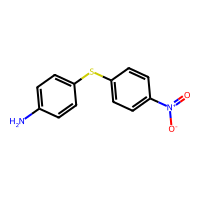
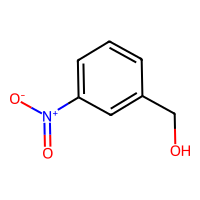
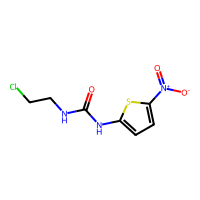
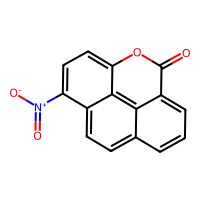
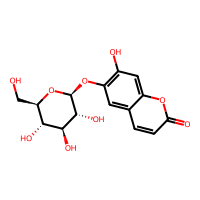
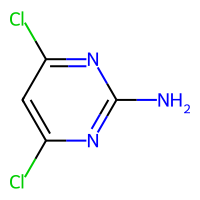
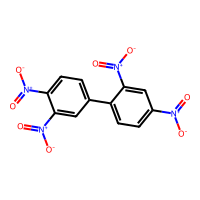
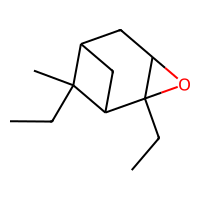
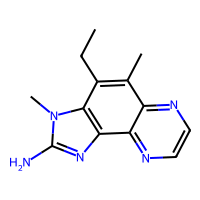

In [113]:
df_1

,Unnamed: 0,Drug_ID,Drug,Y,property,mol
18151,5712.0,5712,CCCCCCC.CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CN3,1,2,
23217,NaN,10778,CC1=C(NC2=CC=CC=C12)CN(CCС)C3=NC(=NC(=C3)C4CC(...,0,2,None
17950,5511.0,5511,CCN(CC)CCCCNC1=NC2=NC(=C(C=C2C=N1)C3=C(C=CC=C3...,1,2,
5767,5767.0,5767,C1CC(C1)C(=O)N2CCN(CC2)C/C=C/C3=CC=CC=C3,1,2,
11025,NaN,11025,CCN(C)C(=O)N1C2=CC=CC=C2C=CC3=CC=CC=C31,1,2,
...,...,...,...,...,...,...
6242,6242.0,6242,COC1=C2C(=C(C=C1)O)C(=O)C3=C(C=C4C(=C3O2)C5C=C...,1,2,
5800,5800.0,5800,CC1=NOC(=C1)CNC(=O)C2=CC3=C(C=C2)N(C(=O)N3CC4C...,1,2,
5234,5234.0,5234,CN(C)CC(=O)NC1CCCC2=C1C=NN2C3=C(C=C(C=C3)F)F,1,2,
5432,5432.0,5432,CC[C@@]1(C2=C(COC1=O)C(=O)N3CC4=C5[C@H](CCC6=C...,1,2,

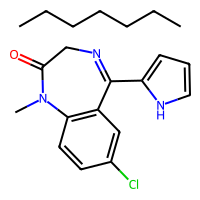
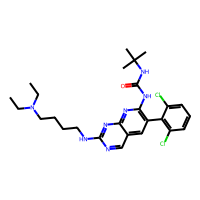
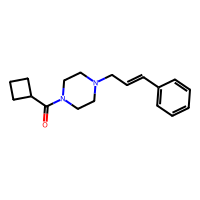
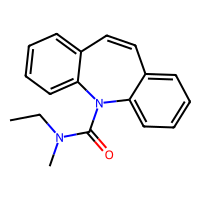
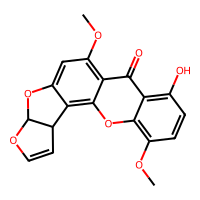
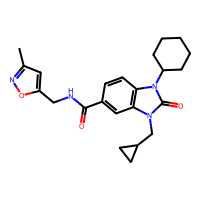
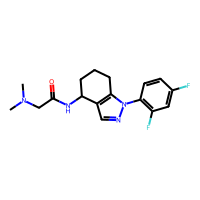
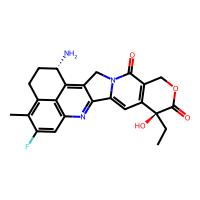

In [114]:
df_2

,Unnamed: 0,Drug_ID,Drug,Y,property,mol
11558,NaN,11558,COC(=O)C1=C(CCС)NC(CCС)=C(C(=O)OC)C1c1ccccc1[N...,0,3,None
11667,NaN,11667,CCCN(C)C1Cc2cccc3cc(O)cc(c23)C1,1,3,
24669,NaN,12230,CN(CCС)CCCC1c2ccccc2Nc2ccc(Cl)cc21,1,3,None
7364,7364.0,7364,CCc1nn(CCCN2CCN(c3cccc(Cl)c3)CC2)c(=O)n1CC,1,3,
7313,7313.0,7313,CC1(C)O[C@@H]2C[C@H]3C4CCC5=CC(=O)C=CC5(C)[C@H...,1,3,
...,...,...,...,...,...,...
19445,7006.0,7006,CCN(CC)C(=S)SSC(=S)N(CC)CC,1,3,
12112,NaN,12112,Cn1c(=O)c2c(ncn2CCN2CCC(c3c[nH]c4ccccc34)CC2)n...,1,3,None
20125,7686.0,7686,CN(C)C(=O)C1(c2ccc(Cl)cc2)CCN(CCCC(=O)c2ccc(F)...,1,3,
25904,NaN,25904,CCCN(CCCCN1C(=O)CC2(CCCC2)CC1=O)C1COc2cccc(OCC...,1,3,

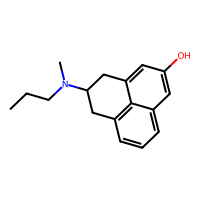
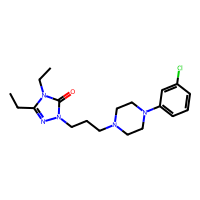
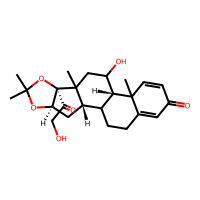
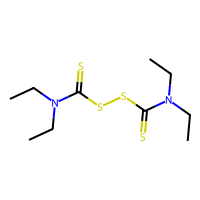
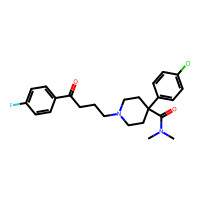
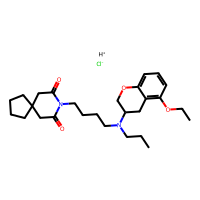
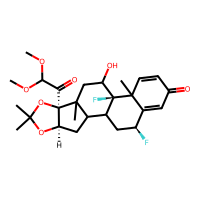

In [115]:
df_3

In [122]:
good_3 = []

for i in df_3.iterrows():
    mol = i[1]["mol"]

    if mol != None:
        good_3.append(i[1])

In [128]:
import pandas as pd
import datamol as dm
import numpy as np

from molfeat.calc import RDKitDescriptors2D, FPCalculator, MordredDescriptors
from molfeat.trans import MoleculeTransformer

In [129]:
from molfeat.trans.concat import FeatConcat
from molfeat.trans.fp import FPVecTransformer

rdkit = FPVecTransformer("desc2D", n_jobs=8, dtype=np.float32, replace_nan=True)
maccs = FPVecTransformer("maccs", dtype=np.float32)
ecfp4 = FPVecTransformer("ecfp:4", dtype=np.float32)

# Wrap the calculator in a transformer instance
featurizer = FeatConcat([maccs, ecfp4, rdkit], dtype=np.float32)

In [130]:
good_1 = pd.DataFrame(good_1)
good_2 = pd.DataFrame(good_2)
good_3 = pd.DataFrame(good_3)

In [142]:
with dm.without_rdkit_log():
    feats_1 = featurizer(good_1["mol"])
    feats_2 = featurizer(good_2["mol"])
    feats_3 = featurizer(good_3["mol"])

In [143]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [144]:
def calc_roc_model(model, X, y, scaling=False):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.1, random_state=75, stratify=y
    )
    if scaling:
        mm = MinMaxScaler()
        X_train = mm.fit_transform(X_train)
        X_val = mm.transform(X_val)
    model.fit(X_train, y_train)
    return roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

In [152]:
X_1 = np.array(feats_1.tolist())
X_2 = np.array(feats_2.tolist())
X_3 = np.array(feats_3.tolist())

In [161]:
Y_1 = good_1["Y"]
Y_2 = good_2["Y"]
Y_3 = good_3["Y"]

In [162]:
Y_1 = Y_1.reset_index()
del Y_1["index"]
Y_2 = Y_2.reset_index()
del Y_2["index"]
Y_3 = Y_3.reset_index()
del Y_3["index"]

In [171]:
calc_roc_model(clf, X_3, Y_3["Y"])

0.9940117896135165

In [172]:
sample = pd.read_csv("sample.csv")

In [203]:
from sklearn.ensemble import RandomForestClassifier

clf_1 = RandomForestClassifier(n_estimators=100)
clf_2 = RandomForestClassifier(n_estimators=100)
clf_3 = RandomForestClassifier(n_estimators=100)

In [176]:
X1_train, X1_val, y1_train, y_val = train_test_split(
    X_3, Y_3["Y"], test_size=0.1, random_state=75, stratify=Y_3["Y"]
)

In [204]:
clf_1.fit(X_1, Y_1["Y"])
clf_2.fit(X_2, Y_2["Y"])
clf_3.fit(X_3, Y_3["Y"])

RandomForestClassifier()

In [188]:
X_test = dm.read_csv("test_data.csv", smiles_column="Drug", index_col=0)

[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors
[15:52:51] WARNING: not removing hydrogen atom without neighbors


,Drug_ID,Drug,property,mol
0,0,Cc1cc(=O)oc2ccc3c(c12)C1(C)OOC1(C)O3,1,
1,1,CN(CC(O)CO)N=O,1,
2,2,O=[N+]([O-])c1ccc(OC2CO2)cc1,1,
3,3,Cn1cnc2cc([N+](=O)[O-])ccc21,1,
4,4,CC[C@H](CO)NCCN[C@H](CC)CO,1,
...,...,...,...,...
1216,1216,CCN(CC)C(=O)COc1cc2c(O)c3c(O)c(C)c4c(c13)C(=O)...,3,
1217,1217,O=C(Cc1ccc(Cl)c(Cl)c1)N1CCc2sccc2[C@H]1CN1CCCC1,3,
1218,1218,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)CC[C@H]3[C@...,3,
1219,1219,Cn1nc(-c2cccc(F)c2)n(C)c1=S,3,

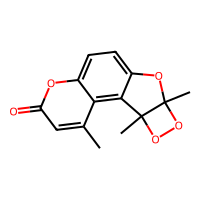
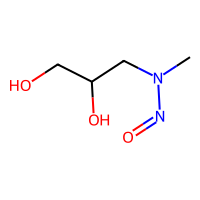
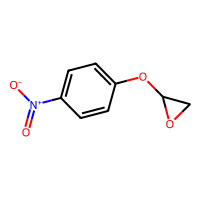
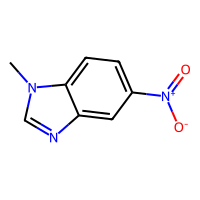
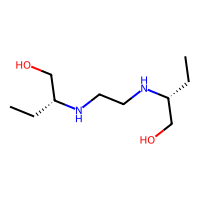
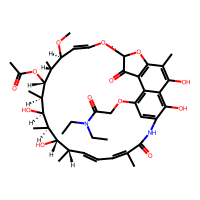
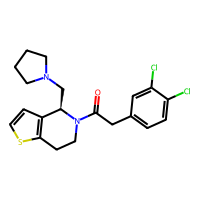
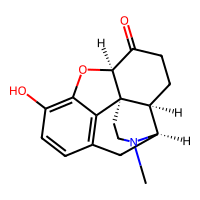
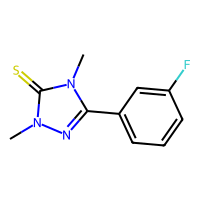
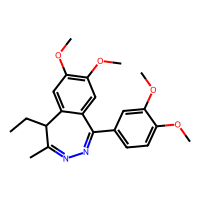

In [189]:
X_test

In [208]:
test_1 = []
test_2 = []
test_3 = []

for i in X_test.iterrows():
    prop = i[1]["property"]

    if prop == 1:
        test_1.append(i[1])
    if prop == 2:
        test_2.append(i[1])
    if prop == 3:
        test_3.append(i[1])

In [212]:
test_1 = pd.DataFrame(test_1)
test_2 = pd.DataFrame(test_2)
test_3 = pd.DataFrame(test_3)

In [213]:
with dm.without_rdkit_log():
    test_feats_1 = featurizer(test_1["mol"])
    test_feats_2 = featurizer(test_2["mol"])
    test_feats_3 = featurizer(test_3["mol"])

In [215]:
test_feats_2

array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 4.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [220]:
Y_1 = clf_1.predict_proba(test_feats_1)[:, 1]
Y_2 = clf_2.predict_proba(test_feats_2)[:, 1]
Y_3 = clf_3.predict_proba(test_feats_3)[:, 1]

In [226]:
df_y_1 = pd.DataFrame(Y_1)
df_y_2 = pd.DataFrame(Y_2)
df_y_3 = pd.DataFrame(Y_3)

In [228]:
final_df = pd.concat([df_y_1, df_y_2], ignore_index=True)

In [230]:
final_df = pd.concat([final_df, df_y_3], ignore_index=True)

In [231]:
final_df

,0
0,0.87
1,1.00
2,0.99
3,0.88
4,0.12
...,...
1216,0.02
1217,0.86
1218,0.98
1219,0.92


In [237]:
final_df.to_csv("sub_3", index=False)

In [242]:
indexes = []

for i in final_df.iterrows():
    indexes.append(i[0])

In [243]:
del final_df["Id"]

In [244]:
final_df

,0
0,0.87
1,1.00
2,0.99
3,0.88
4,0.12
...,...
1216,0.02
1217,0.86
1218,0.98
1219,0.92


In [250]:
del final_df["id"]
final_df.insert(0, "id", indexes)

In [251]:
sample

,id,Y
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
1216,1216,0
1217,1217,0
1218,1218,0
1219,1219,0


In [261]:
print(final_df.rename(columns={"0": "Y"}, inplace=True))

None


In [263]:
final_df.columns = final_df.columns.str.replace("NaN", "Y")

In [265]:
final_df.columns = ["id", "Y"]

In [266]:
final_df

,id,Y
0,0,0.87
1,1,1.00
2,2,0.99
3,3,0.88
4,4,0.12
...,...,...
1216,1216,0.02
1217,1217,0.86
1218,1218,0.98
1219,1219,0.92


In [269]:
final_df.to_csv("sub_3.csv", index=False)

In [271]:
pd.read_csv("sub_3.csv")

,id,Y
0,0,0.87
1,1,1.00
2,2,0.99
3,3,0.88
4,4,0.12
...,...,...
1216,1216,0.02
1217,1217,0.86
1218,1218,0.98
1219,1219,0.92


In [272]:
sample

,id,Y
0,0,1
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
1216,1216,0
1217,1217,0
1218,1218,0
1219,1219,0
